In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

%matplotlib inline
plt.style.use('fivethirtyeight')

In [8]:
data = pd.read_csv('../data/advertising.csv', index_col = 0)

In [9]:
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [10]:
sm.stats.ztest(data.radio, data.newspaper)   # (z score, p-value)

(-3.911403345381785, 9.176137849809707e-05)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c1ecd2c50>,
      dtype=object)

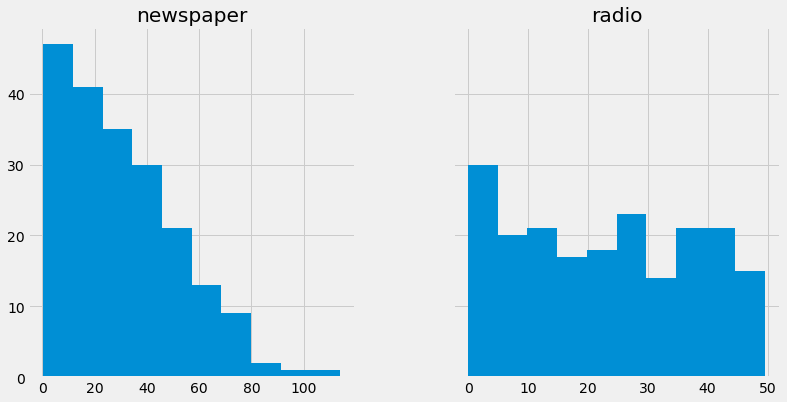

In [11]:
data[['radio', 'newspaper']].hist(sharey = True, figsize = (12, 6))

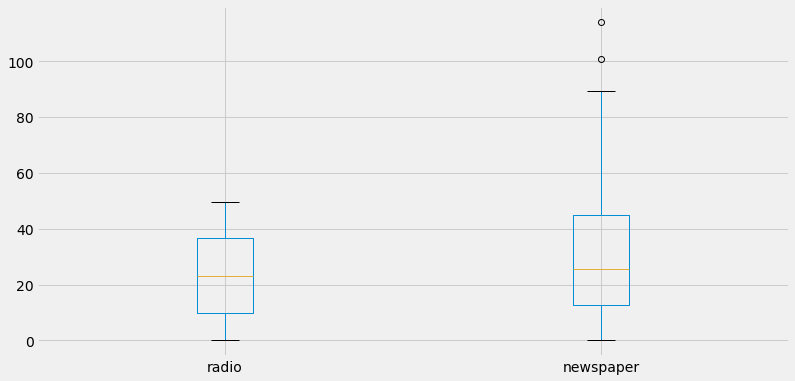

In [12]:
data[['radio', 'newspaper']].boxplot(figsize = (12, 6))

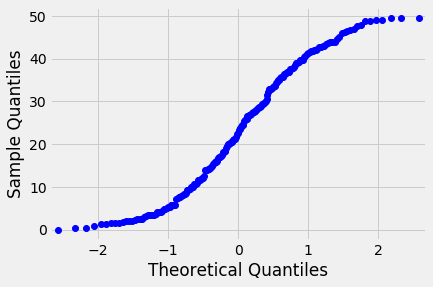

In [13]:
from statsmodels.graphics.gofplots import qqplot
x = qqplot(data.radio)

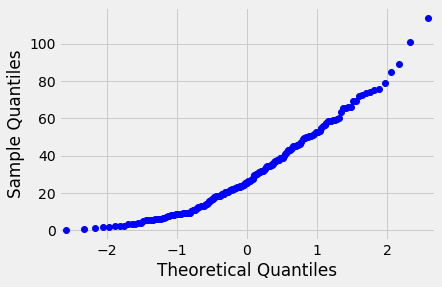

In [16]:
x = qqplot(data.newspaper)

In [18]:
from scipy.stats import shapiro

shapiro(data.radio)

(0.9440046548843384, 5.196915822125447e-07)

In [19]:
shapiro(data.newspaper)

(0.9363998770713806, 1.1271832534021087e-07)

In [23]:
d_radio = (data.radio - data.radio.mean())/data.radio.std()
d_newspaper = (data.newspaper - data.newspaper.mean())/data.newspaper.std()

In [22]:
from scipy.stats import kstest
kstest(d_radio, 'norm')

KstestResult(statistic=0.08395825811656044, pvalue=0.11261277203399504)

In [24]:
kstest(d_newspaper, 'norm')

KstestResult(statistic=0.09850995031682896, pvalue=0.03844791153432069)

In [28]:
data1 = [0] * 50
data1.extend(np.random.normal(14, 4, 150))
np.random.shuffle(data1)

data2 = [0] * 100
data2.extend(np.random.normal(20, 5, 100))
np.random.shuffle(data2)

df = pd.DataFrame()
df['A'] = data1
df['B'] = data2
df.head()

,A,B
0,14.898453,22.092788
1,10.530008,0.000000
2,9.204415,20.278286
3,0.000000,19.026361
4,0.000000,0.000000


In [31]:
sm.stats.ztest(df.A,df.B)

(0.2294034349585963, 0.8185553666359918)

In [32]:
df.A.mean()

10.637100096984186

In [33]:
df.B.mean()

10.42439479840446

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c1f286780>,
      dtype=object)

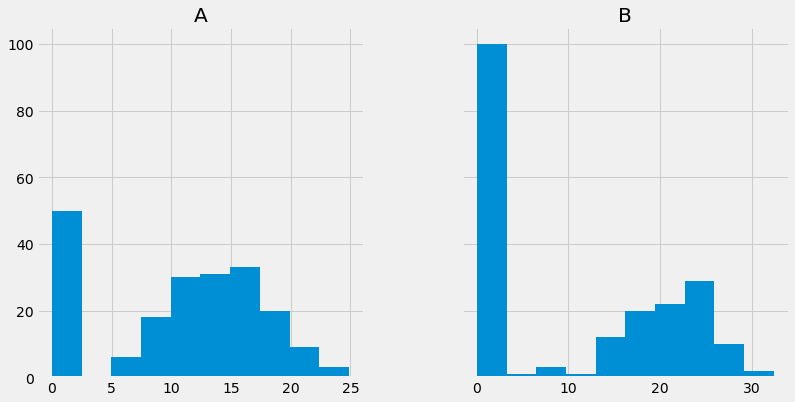

In [35]:
df[['A', 'B']].hist(sharey = True, figsize = (12, 6))

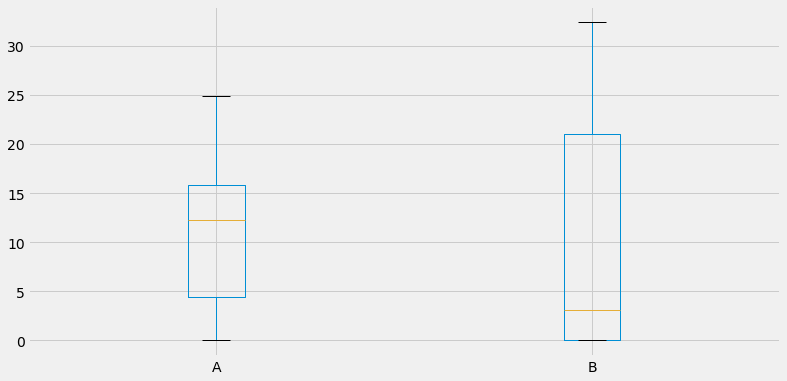

In [36]:
df[['A', 'B']].boxplot( figsize = (12, 6))

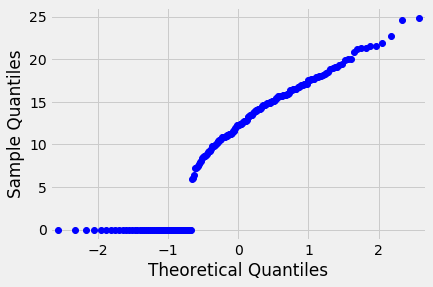

In [42]:
x = qqplot(df.A)

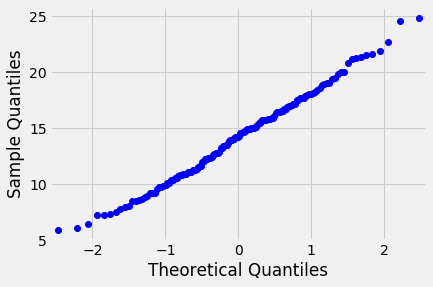

In [44]:
x = qqplot(df[df.A > 0].A)

In [37]:
shapiro(df.A)

(0.893846333026886, 1.037404329107261e-10)

In [38]:
shapiro(df.B)

(0.7781735062599182, 4.091109048838575e-16)

In [39]:
kstest((df.A - df.A.mean()/df.A.std()), 'norm')

KstestResult(statistic=0.7499948454745874, pvalue=7.04313318085075e-117)

In [40]:
kstest((df.B - df.B.mean()/df.B.std()), 'norm')

KstestResult(statistic=0.49999993564605616, pvalue=9.25665724742955e-47)

In [46]:
from scipy.stats import ttest_ind
test_stat, p_value = ttest_ind(df.A,df.B,equal_var = False)
(test_stat, p_value)

(0.2294034349585963, 0.8186940618779743)

In [48]:
import scipy.stats as ss

In [49]:
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [55]:
ss.f_oneway(data.radio, data.TV, data.newspaper)

F_onewayResult(statistic=358.8514595342596, pvalue=4.552931539744962e-103)

In [57]:
ss.kruskal(data.radio, data.TV, data.newspaper)

KruskalResult(statistic=257.66637166931656, pvalue=1.1180424828789922e-56)